d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\College\6th sem\Time Series Forecasting & NLP\.venv\L

Optimal AR order selected using AIC: AR(14)



d:\College\6th sem\Time Series Forecasting & NLP\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Final AR Model Summary:
                                 SARIMAX Results                                  
Dep. Variable:     Power_Consumption_diff   No. Observations:                  316
Model:                    ARIMA(14, 0, 0)   Log Likelihood                -729.487
Date:                    Fri, 30 Jan 2026   AIC                           1490.974
Time:                            12:45:42   BIC                           1551.066
Sample:                        02-01-1988   HQIC                          1514.980
                             - 05-01-2014                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1322      0.036      3.710      0.000       0.062       0.202
ar.L1         -0.3717      0.052     -7.123      0.000      -0.474      -0.

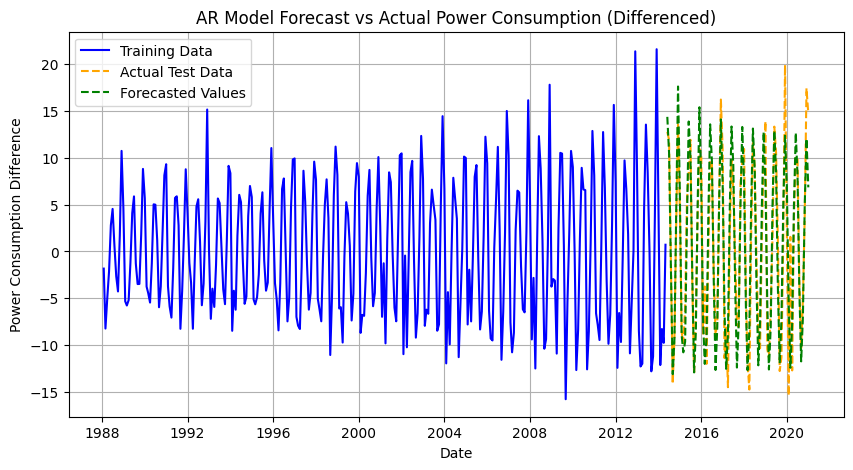

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

# =========================
# LOAD DATA
# =========================

df = pd.read_csv("./ML471_S2_Datafile_Concept(in).csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

series = df['Power_Consumption_diff'].dropna()

# =========================
# TRAIN-TEST SPLIT (80:20)
# =========================
split_index = int(len(series) * 0.8)
train = series.iloc[:split_index]
test = series.iloc[split_index:]

# =========================
# AR MODEL SELECTION USING AIC
# =========================
aic_values = {}

for p in range(0, 15):
    try:
        model = ARIMA(train, order=(p, 0, 0))
        result = model.fit()
        aic_values[p] = result.aic
    except:
        continue

best_p = min(aic_values, key=aic_values.get)
print(f"Optimal AR order selected using AIC: AR({best_p})\n")

# =========================
# FIT FINAL AR MODEL
# =========================
final_model = ARIMA(train, order=(best_p, 0, 0))
final_result = final_model.fit()

print("Final AR Model Summary:")
print(final_result.summary())
print()

# =========================
# RESIDUAL DIAGNOSTICS
# =========================
lb_test = acorr_ljungbox(final_result.resid, lags=[1], return_df=True)

print("Ljung-Box Test Results (Lag 1):")
print(lb_test)
print()

# =========================
# FORECASTING
# =========================
forecast = final_result.forecast(steps=len(test))

# =========================
# EVALUATION METRICS
# =========================
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("Forecast Evaluation Metrics:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

# =========================
# VISUALIZATION
# =========================
plt.figure(figsize=(10, 5))

plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Test Data', linestyle='--', color='orange')
plt.plot(test.index, forecast, label='Forecasted Values', linestyle='--', color='green')

plt.title('AR Model Forecast vs Actual Power Consumption (Differenced)')
plt.xlabel('Date')
plt.ylabel('Power Consumption Difference')
plt.legend()
plt.grid(True)
plt.show()